<a href="https://colab.research.google.com/github/Sandipan0303/Rossman-retail-sales-prediction/blob/main/Copy_of_Colab_Notebook_Rossmann_Sales_Prediction_Sandipan_Das.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

# <b> Problem Description </b>
---
### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# <b> Data Description </b>
---
### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a (Store, Date) duple within the test set
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what you are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = Public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* #### **StoreType** - differentiates between 4 different store models: a, b, c, d
* #### **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **Introduction to Rossmann**
---
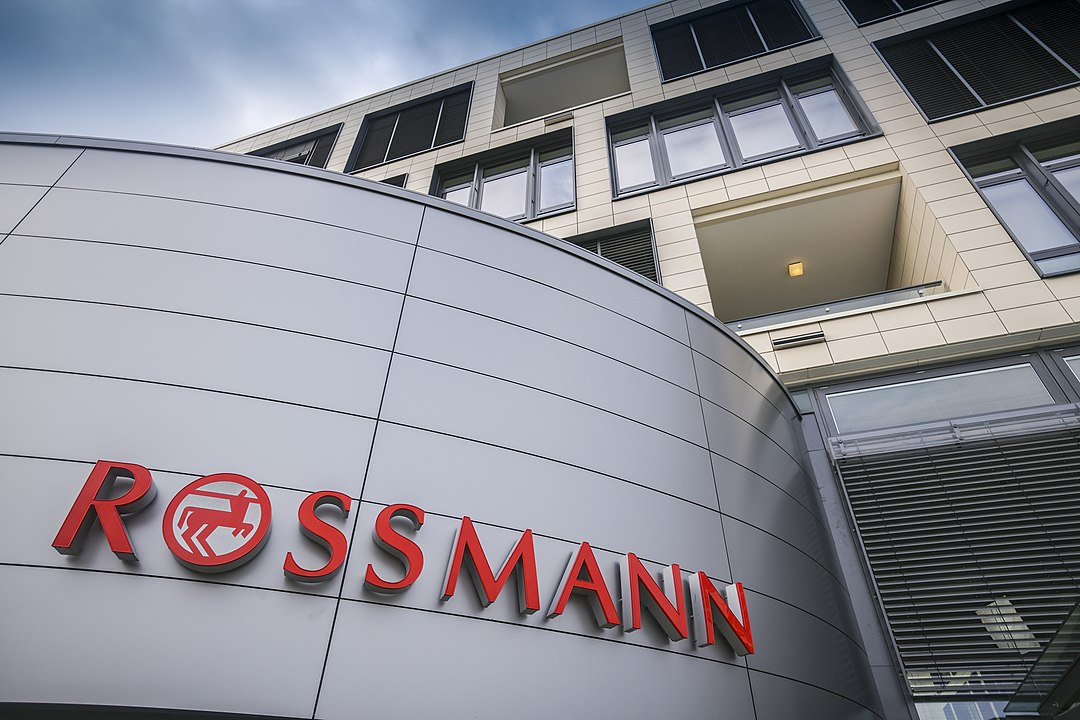

**Dirk Rossmann GmbH**, commonly referred to as **Rossmann**, is one of the largest drug store chains in Europe with around 56,200 employees and more than 4000 stores. The company was founded in 1972 by Dirk Rossmann with its headquarters in Burgwedel near Hanover in Germany. The Rossmann family owns 60% of the company. The Hong Kong-based A.S. Watson Group owns 40%, which was taken over from the Dutch Kruidvat in 2004.

In 2019 Rossmann had more than €10 billion turnover in Germany, Poland, Hungary, the Czech Republic, Turkey, Albania, Kosovo and Spain. In 2021, sales increased by 8.1 percent to 11.1 billion euros. There are a total of 4,361 Rossmann branches, 2,231 of which are in Germany.

The product range includes up to 21,700 items and can vary depending on the size of the shop and the location. In addition to drugstore goods with a focus on skin, hair, body, baby and health, Rossmann also offers promotional items ("World of Ideas"), pet food, a photo service and a wide range of natural foods and wines. There is also a perfume range with around 200 commercial brands. Rossmann has 29 private brands with 4600 products (as of 2019). In 1997, the first own brands Babydream, Facelle, Sunozon and Winston were introduced. The best-known Rossmann brands are Isana (skin, hair and body care), Alterra (natural cosmetics), domol (cleaning and laundry detergents) alouette (paper tissues etc). 



# Steps Performed In This ML(Supervised) Project
---

Handling dataset with the fundamental steps to unvail the factors :

* Importing Libraries And Loading The Datasets
* Overview Of The Datasets 
    *   Reading & Inspection Of First Dataset
    *   Reading & Inspection Of Second Dataset
    *   Merging both the datasets
    *   Further analysing both the datasets
* Data Wrangling And Processing
    *   Extracting Date
    *   Combining And Creating Columns
    *   Null Value Treatment
    *   Handling Outliers
* Exploratory Data Analysis
* Key Findings and Conclusion From EDA
* Feature Engineering 
    *   Dropping Subsets of Sales
    *   Square Root Transformation
    *   Multicollinearity
    *   Dummification
* ML Model
    *   Train-Test Split
    *   Model Training
  * Linear Regression
  * Lasso
  * Ridge
  * Decision Tree
  * Random Forest
  * Gradient Boosting
  * XGboost
  * Prediction
    * Linear Regression
  * Lasso
  * Ridge
  * Decision Tree
  * Random Forest
  * Gradient Bossting
  * XGboost
* Conclusion  


# <b>1. Importing Required Libraries And Loading The Datasets
---

**Importing Liabraries**

In [ ]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
from pandas import datetime as dt
from pandas import Series,DataFrame
import datetime

# Importing Libraries For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats


# Importing Libraries For ML Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


**Mounting The Drive**

In [ ]:
# Mounting My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading The Datasets**

In [ ]:
# Loading My Datasets
df1 = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction - Capstone Project- Raja Chowdhury/Rossmann Stores Data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Retail Sales Prediction - Capstone Project- Raja Chowdhury/store.csv")

# **2. Overview Of The Datasets**

---



### **First Dataset**

In [ ]:
# Top 10 Rows Of The Dataset
df1.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
# Descriptive Statistic Aspects Of The Dataset.
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Concise Summary Of The Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### **Second Dataset**

In [ ]:
# Top 10 Rows Of The Dataset
df2.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
# Descriptive Statistic Aspects Of The Dataset.
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


In [ ]:
# Concise Summary Of The Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### **After Merging Both The Datasets**

---


In [ ]:
# Merging Both The Datasets On The Store column
df = df1.merge(df2,how='inner',left_on='Store',right_on='Store')


In [ ]:
# Top 10 Rows Of The Dataframe
df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Bottom 10 Rows Of The Dataframe
df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017199,1115,4,2013-01-10,5007,339,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017200,1115,3,2013-01-09,4649,324,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017201,1115,2,2013-01-08,5243,341,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017203,1115,7,2013-01-06,0,0,0,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Shape Of The Dataframe
Row, Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 1017209
Number 0f columns is 18


In [ ]:
# Columns Of Our Dataframe
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Descriptive Statistic Aspects Of The Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,1017209.0,NaN,NaN,NaN,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,NaN,NaN,NaN,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Date,1017209,942,2015-07-31,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,1017209.0,NaN,NaN,NaN,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,NaN,NaN,NaN,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,NaN,NaN,NaN,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,NaN,NaN,NaN,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209,5,0,855087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,1017209.0,NaN,NaN,NaN,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
StoreType,1017209,4,a,551627,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note: We can see some outliers in our dataframe.**

In [ ]:
# Concise Summary Of The Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Note: We can see some null values in our dataframe.**

In [ ]:
# Number Of Unique Values In Each Columns
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

# **3. Data Wrangling And Processing**

---



### **Extracting Date**

In [ ]:
# Checking Our Dataset Period
df.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

**Note: We have dataset for a period of approx 2years and 7 months (From 1st January,2013 to 31st July,2015)**

In [ ]:
# Converting the Date Column Data Type To DateTime 

df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
# Extracting Date,Year,Month,Day,Week,WeekOfYear from Date column for dataset transformation

df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
#df["WeekOfMonth"]=df["Date"].dt.week%4
#df["WeekOfYear"]=df["Date"].dt.week

**Here we have extracted Year, Month and  Day from Date column for further analysis.**

In [ ]:
# After Extracting, Date Column Becomes Irrelevant So Dropping It

df=df.drop(['Date'],axis=1) 

### **Combining And Creating columns**



---


**PromoOpen**

---



In [ ]:
# Creating New Column From Existing Columns
df["PromoOpen"] = (12* (df["Year"]-df["Promo2SinceYear"])) + df["Month"]-((df["Promo2SinceWeek"]/4))

**Here we have created new column called "PromoOpen" from existing columns to measure more accurate period(in Months) from when the store was participating in the Promo2.**

In [ ]:
#Lets Check Our Columns
df[['Promo','Promo2','PromoInterval','Promo2SinceYear', 'Promo2SinceWeek', 'PromoOpen']].sample(10)

,Promo,Promo2,PromoInterval,Promo2SinceYear,Promo2SinceWeek,PromoOpen
351587,0,1,"Jan,Apr,Jul,Oct",2013.0,31.0,13.25
93305,1,0,NaN,NaN,NaN,NaN
877756,0,0,NaN,NaN,NaN,NaN
314174,0,0,NaN,NaN,NaN,NaN
220543,0,1,"Feb,May,Aug,Nov",2013.0,5.0,1.75
458303,0,1,"Jan,Apr,Jul,Oct",2011.0,14.0,41.50
224862,0,1,"Jan,Apr,Jul,Oct",2012.0,40.0,18.00
345490,0,0,NaN,NaN,NaN,NaN
466506,0,1,"Mar,Jun,Sept,Dec",2013.0,5.0,28.75
171675,0,1,"Jan,Apr,Jul,Oct",2014.0,40.0,-11.00


In [ ]:
# Checking PromoOpen Negative figures 
df[df["PromoOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoOpen
17926,20,1,9229,954,1,1,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,30,-4.0
17927,20,7,0,0,0,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,29,-4.0
17928,20,6,5572,566,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,28,-4.0
17929,20,5,7149,839,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,27,-4.0
17930,20,4,8118,997,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,26,-4.0
17931,20,3,7212,911,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,25,-4.0
17932,20,2,7104,854,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,24,-4.0
17933,20,1,7856,946,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,23,-4.0
17934,20,7,0,0,0,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,22,-4.0
17935,20,6,4862,499,1,0,0,0,d,a,...,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2014,6,21,-4.0


In [ ]:
# Replacing Those Negative Figures With Zero 
df.loc[df["PromoOpen"]<0, "PromoOpen" ] = 0

**Here PromoOpen column has figures in negative which indicates that the store have not started any promo yet. So we have replace those negative figures with zero**.



---


**CompetitionOpen**

---



In [ ]:
# Creating New Column From Existing Columns
df["CompetitionOpen"] = (12* (df["Year"]-df["CompetitionOpenSinceYear"])) + (df["Month"]-df["CompetitionOpenSinceMonth"])

**Here we have created new column called "CompetitionOpen" from existing columns to measure the period(in months) from whem the nearest competition has opened.**

In [ ]:
#Lets Check Our Columns
df[['CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
881826,3560.0,2013.0,9.0,-8.0
559125,250.0,2007.0,6.0,70.0
788839,9680.0,NaN,NaN,NaN
79238,560.0,2010.0,12.0,35.0
855019,1340.0,NaN,NaN,NaN
313354,300.0,2011.0,4.0,21.0
950225,3440.0,NaN,NaN,NaN
97335,1930.0,2009.0,9.0,56.0
890503,520.0,2005.0,9.0,100.0
51663,420.0,2014.0,6.0,-5.0


In [ ]:
# Checking CompetitionOpen Negative figures 
df[df["CompetitionOpen"]<0].head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,PromoOpen,CompetitionOpen
3890,5,2,7692,659,1,1,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,31,NaN,-1.0
3891,5,1,8847,770,1,1,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,30,NaN,-1.0
3892,5,7,0,0,0,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,29,NaN,-1.0
3893,5,6,2038,219,1,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,28,NaN,-1.0
3894,5,5,4181,499,1,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,27,NaN,-1.0
3895,5,4,3711,460,1,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,26,NaN,-1.0
3896,5,3,4325,613,1,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,25,NaN,-1.0
3897,5,2,4073,537,1,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,24,NaN,-1.0
3898,5,1,4028,540,1,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,23,NaN,-1.0
3899,5,7,0,0,0,0,0,0,a,a,...,2015.0,0,NaN,NaN,NaN,2015,3,22,NaN,-1.0


In [ ]:
# Replacing Those Negative Figures With Zero
df.loc[df["CompetitionOpen"]<0, "CompetitionOpen" ] = 0

**Here CompetitionOpen column has figures in negative which indicates that the store do not have any competition. So we have replace those negative figures with zero**.

In [ ]:
# Finally Dropping Irrelevant COlumns
df = df.drop(["Promo2SinceYear","Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth","PromoInterval"], axis=1) 



---


**StateHoliday**

---



In [ ]:
# Checking StateHoliday column values and its counts
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Replacing value with 0 integer 
df['StateHoliday']= df['StateHoliday'].replace('0',0)

In [ ]:
# Checking StateHoliday column values and its counts
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### **Null Value Treatment**

In [ ]:
#Checking the number of Null Values in our columns.
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

CompetitionDistance column has 2642 null values.

PromoOpen column has 508031 null values.

CompetitionOpen column has 323348 null values.



**Note: PromoInterval and PromoOpen has similar number of null values which means when promo is not open then promo have no interval as well.**

In [ ]:
# Checking the percentage of Null Values in our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
print(missing_value)

                      Total  Percentage
PromoOpen            508031   49.943620
CompetitionOpen      323348   31.787764
CompetitionDistance    2642    0.259730
Assortment                0    0.000000
Day                       0    0.000000
Month                     0    0.000000
Year                      0    0.000000
Promo2                    0    0.000000
Store                     0    0.000000
DayOfWeek                 0    0.000000
SchoolHoliday             0    0.000000
StateHoliday              0    0.000000
Promo                     0    0.000000
Open                      0    0.000000
Customers                 0    0.000000
Sales                     0    0.000000
StoreType                 0    0.000000


In [ ]:
# We can see that the number of null value present in PromoOpen and PromoInterval is same as the number of time promo2 was not running.

print("0 = store is not participating, 1 = store is participating")
df.Promo2.value_counts()

0 = store is not participating, 1 = store is participating


1    509178
0    508031
Name: Promo2, dtype: int64

**Note: The number of null values present in PromoOpen and PromoInterval is same as the number of time when store was not participating in Promo2.**

In [ ]:
# Checking dataset when Promo2 is zero
df[df["Promo2"]==0].sample(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,PromoOpen,CompetitionOpen
673072,740,6,9911,752,1,0,0,1,d,a,6400.0,0,2015,4,4,NaN,13.0
902154,990,4,5094,465,1,0,0,0,d,a,20930.0,0,2015,3,12,NaN,NaN
970188,1064,6,7595,883,1,0,0,0,a,c,420.0,0,2014,9,27,NaN,NaN
165588,183,7,0,0,0,0,0,0,a,a,9670.0,0,2013,6,23,NaN,NaN
388686,426,6,3416,461,1,0,0,0,a,a,250.0,0,2013,10,5,NaN,NaN
353990,388,1,14827,1458,1,1,0,0,a,a,2260.0,0,2013,4,8,NaN,NaN
535682,588,7,0,0,0,0,0,0,d,c,15720.0,0,2015,1,4,NaN,58.0
21037,23,1,9491,710,1,1,0,0,d,a,4060.0,0,2013,3,18,NaN,91.0
859688,944,1,9387,1333,1,1,0,1,c,a,1670.0,0,2014,11,3,NaN,0.0
464581,510,5,7139,755,1,0,0,1,a,c,8260.0,0,2015,7,24,NaN,NaN


**We can see that whenever the store was not participating in Promo2, we had null values present in PromoOpen and PromoInterval columns as well.**

In [ ]:
#Making function for imputing zero in place of null values
def impute_zero(series):
    return series.fillna(0)

df.PromoOpen = df['PromoOpen'].transform(impute_zero)


**Here we have imputed zero in place of null values present in PromoOpen and PromoInterval columns because logically when promo2 is zero then PromoOpen and PromoInterval should be zero too.**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

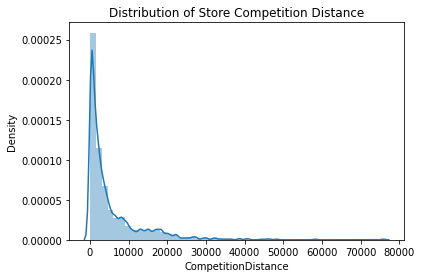

In [ ]:
# let's first have a look at its distribution of CompetitionDistance

sns.distplot(df.CompetitionDistance)
plt.title("Distribution of Store Competition Distance")

In [ ]:
# Filling null values using median as CompetitionDistance column is skewed towards right

df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True) 

In [ ]:
# Filling null values using mode as CompetitionOpen column is made by combining the two categorical columns

df['CompetitionOpen'].fillna(df['CompetitionOpen'].mode()[0], inplace = True)

In [ ]:
#Better To Double Check
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Year                   0
Month                  0
Day                    0
PromoOpen              0
CompetitionOpen        0
dtype: int64

### **Handling Outliers**

In [ ]:
# let's look at the statistical aspects of the dataframes for determining outliners.
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,PromoOpen,CompetitionOpen
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,5.005638e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.308429e+01,4.203993e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.999999e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.897466e+01,6.534447e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,0.000000e+00,1.600000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,2.500000e+01,7.300000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,7.125000e+01,1.386000e+03


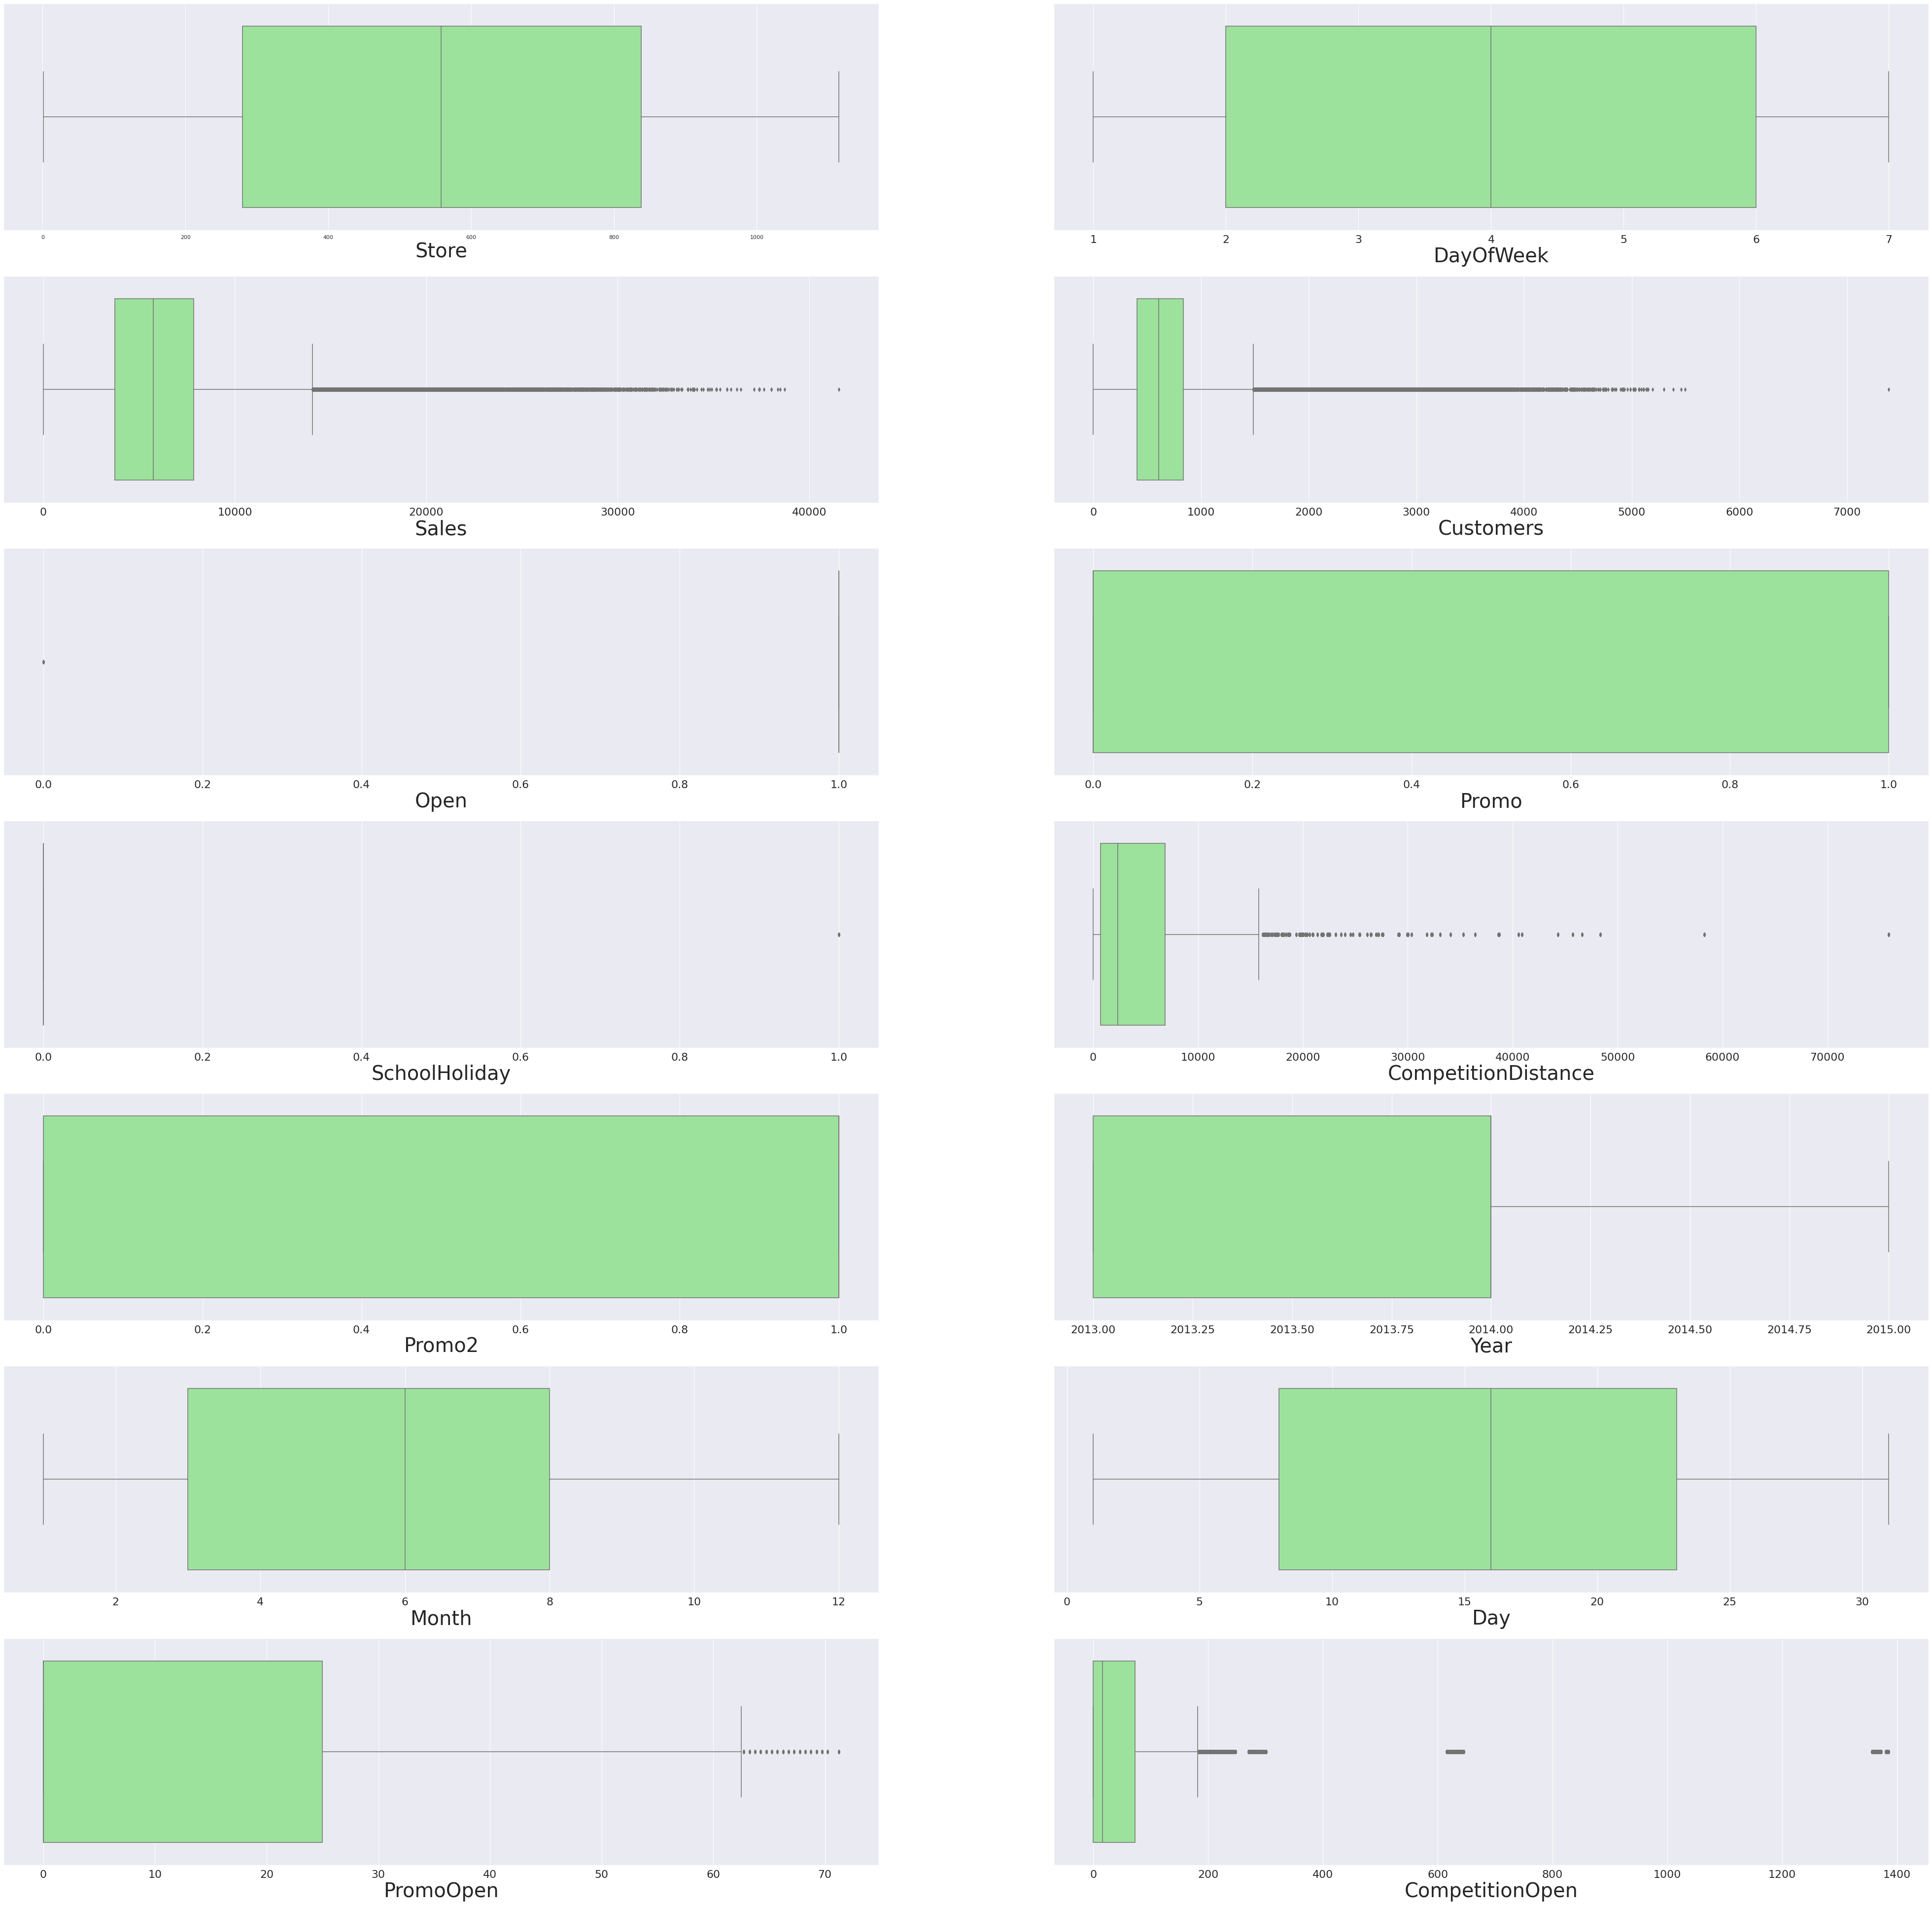

In [ ]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= 'lightgreen')
  plt.xlabel(i[1], fontsize=40)


In [ ]:
# Removing outliers using z score method on sales column.
df['z_sale'] = np.abs(stats.zscore(df['Sales']))
df = df[(df['z_sale'] < 3)]
df.drop(['z_sale'],axis=1,inplace=True)

In [ ]:
# Removing outliers using z score method on customers column.
df['z_customer'] = np.abs(stats.zscore(df['Customers']))
df = df[(df['z_customer'] < 3)]
df.drop(['z_customer'],axis=1,inplace=True)

In [ ]:
# Shape of our dataset after removing outliers
df.shape

(996977, 17)

**Here 'Sales' and 'Customers' are very important columns so outliers in these columns may affect our prediction tremendously therefore we have removed them using z score method.**

In [ ]:
#Capping the outlier rows with Percentiles

upper_lim = df['CompetitionDistance'].quantile(.95)
lower_lim = df['CompetitionDistance'].quantile(.05)
df.loc[(df["CompetitionDistance"] > upper_lim),"CompetitionDistance"] = upper_lim
df.loc[(df["CompetitionDistance"] < lower_lim),"CompetitionDistance"] = lower_lim

upper_lim = df['CompetitionOpen'].quantile(.95)
lower_lim = df['CompetitionOpen'].quantile(.05)
df.loc[(df["CompetitionOpen"] > upper_lim),"CompetitionOpen"] = upper_lim
df.loc[(df["CompetitionOpen"] < lower_lim),"CompetitionOpen"] = lower_lim

upper_lim = df['PromoOpen'].quantile(.95)
lower_lim = df['PromoOpen'].quantile(.05)
df.loc[(df["PromoOpen"] > upper_lim),"PromoOpen"] = upper_lim
df.loc[(df["PromoOpen"] < lower_lim),"PromoOpen"] = lower_lim


**Here we have replaced outliers with different percentile values using capping method as the number of outliers were huge.**

# **4. Exploratory Data Analysis**


---



Text(0.5, 1.0, 'Count Of Store Models')

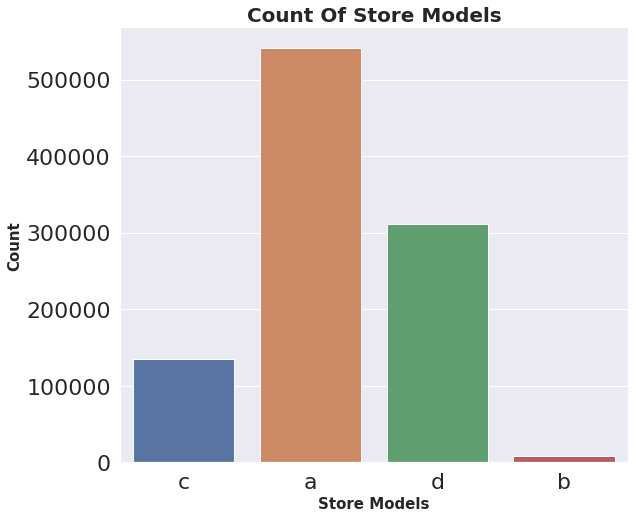

In [ ]:
# Plotting a subplot bar graph for Store Models
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.countplot(df['StoreType'])
ax.set_xlabel('Store Models',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"})
ax.set_title("Count Of Store Models",fontsize=20,fontdict={"weight": "bold"})

**Here we can infer that 'a' Store Model have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts.**

Text(0.5, 0, 'Store Models')

<Figure size 1440x360 with 0 Axes>

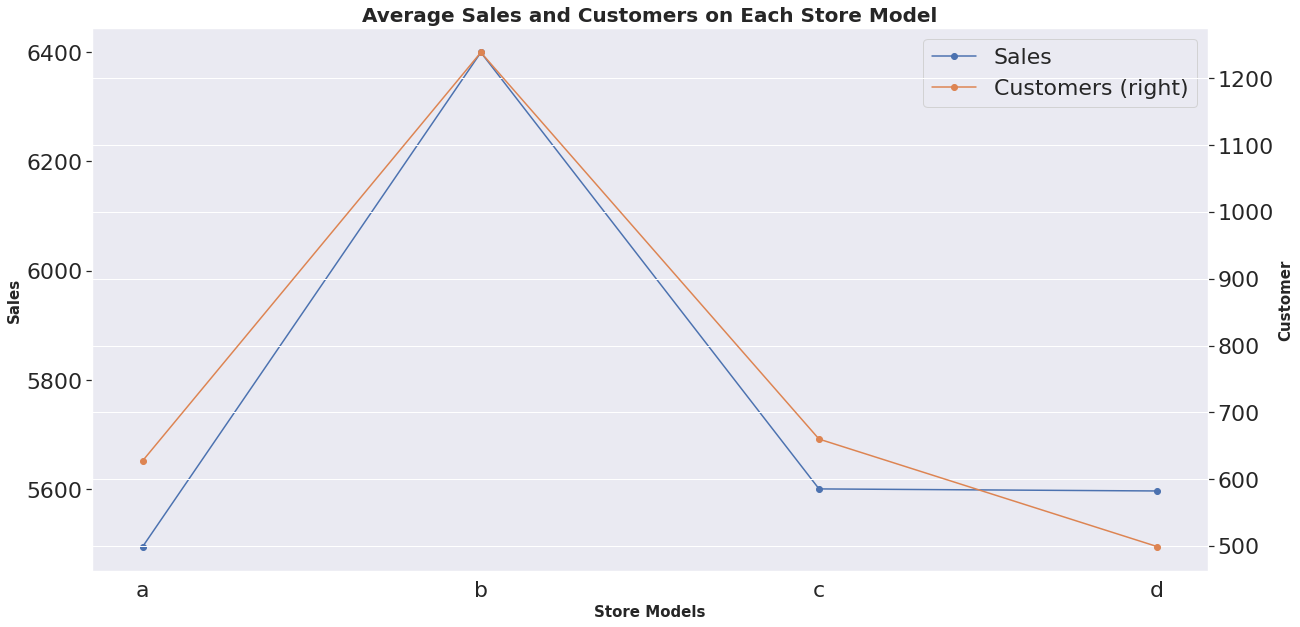

In [ ]:
# Plotting Average sales and customers on each store model using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('StoreType')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.title('Average Sales and Customers on Each Store Model',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Store Models',size=15,fontdict={"weight": "bold"})

**Here it is surprising to see that store model "b" which have least number of store counts performs quite well on average sales and customers compared to other store models.**  

Text(0.5, 1.0, 'Count Of Assortment Levels')

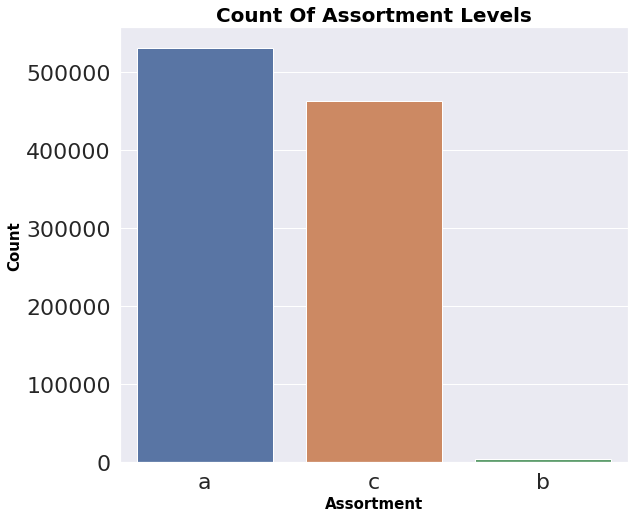

In [ ]:
#  Plotting a subplot bar graph for Assortment
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax=sns.countplot(df['Assortment'])
ax.set_xlabel('Assortment',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_ylabel('Count',size=15,fontdict={"weight": "bold"}, color='black')
ax.set_title("Count Of Assortment Levels",fontsize=20,fontdict={"weight": "bold"}, color='black')

**a = Basic, b = Extra, c = Extended**

**Here we can see that Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts.**

Text(0.5, 0, 'Assortment Levels')

<Figure size 1440x360 with 0 Axes>

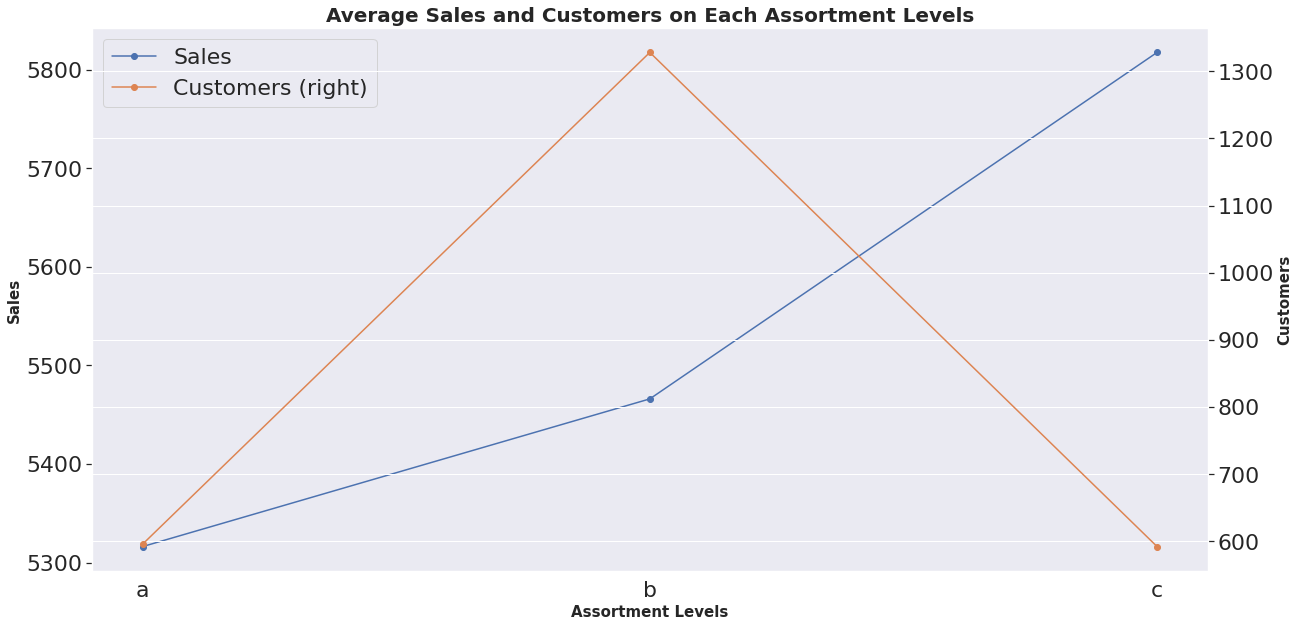

In [ ]:
# Plotting Average sales and customers on each assortment level using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Assortment')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customers',size=15,fontdict={"weight": "bold"})
plt.title('Average Sales and Customers on Each Assortment Levels',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Assortment Levels',size=15,fontdict={"weight": "bold"})

**Here again it is surprising to see that assortment level 'b' with least store counts have perform quite well compared to 'a'. While there is an another surprising fact that assortment level 'c' have maximum number of sales with the least number of customers.**

Text(0.5, 1.0, 'Impact of Promo on Sales and Customers')

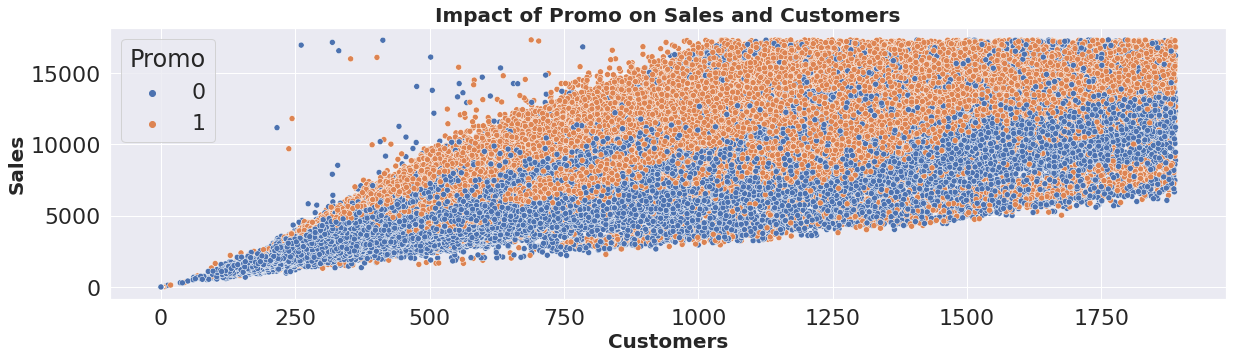

In [ ]:
# Plotting Effect of Promo on Sales and Customers using scatterplot
plt.figure(figsize=(20,5))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=20,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=20,fontdict={"weight": "bold"})
ax.set_title("Impact of Promo on Sales and Customers",fontsize=20,fontdict={"weight": "bold"})

**Here we can see from the graph that there is a linear relationship between customer and sales and it is also noticiable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.**

Text(0.5, 0, 'Date')

<Figure size 1440x360 with 0 Axes>

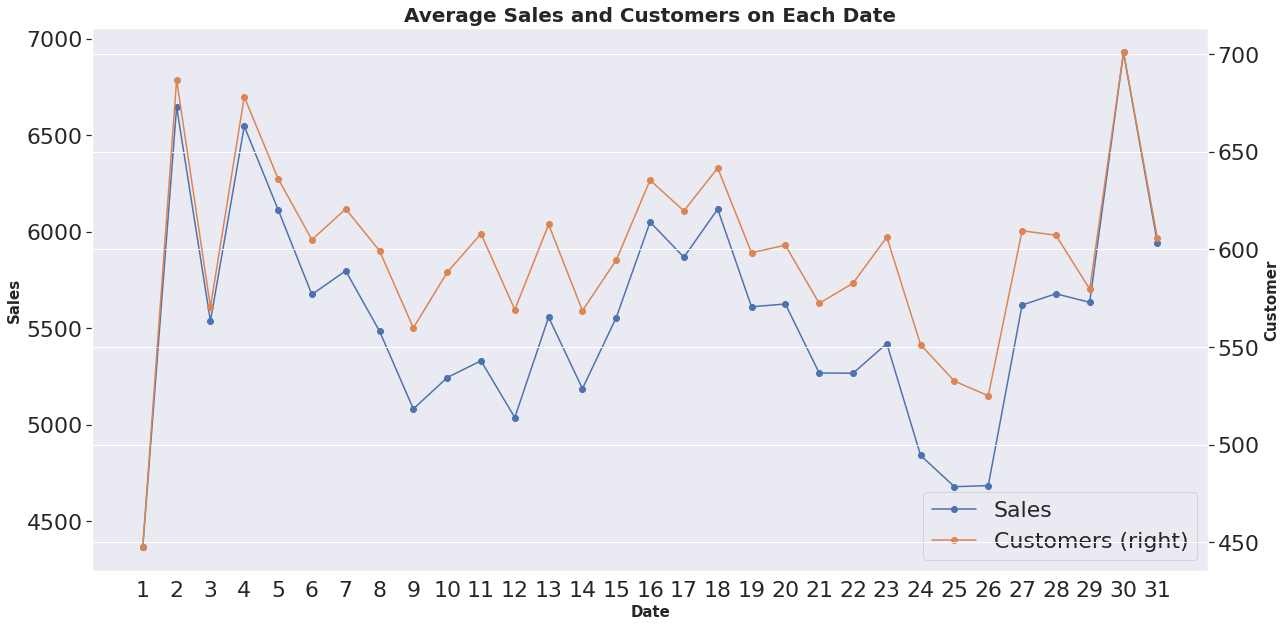

In [ ]:
# Plotting Average sales and number of customers per Day using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Day')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(20,10), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
ax.set_xticks(range(1,32))
plt.title('Average Sales and Customers on Each Date',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Date',size=15,fontdict={"weight": "bold"})

**Here we can infer from the graph that the sales is highest on 30th followed by 2nd and 4th date of every month while sales is lowest on the 1st date of every month followed by 25th and 26th date.**

Text(0.5, 0, 'Day Of Week')

<Figure size 1440x360 with 0 Axes>

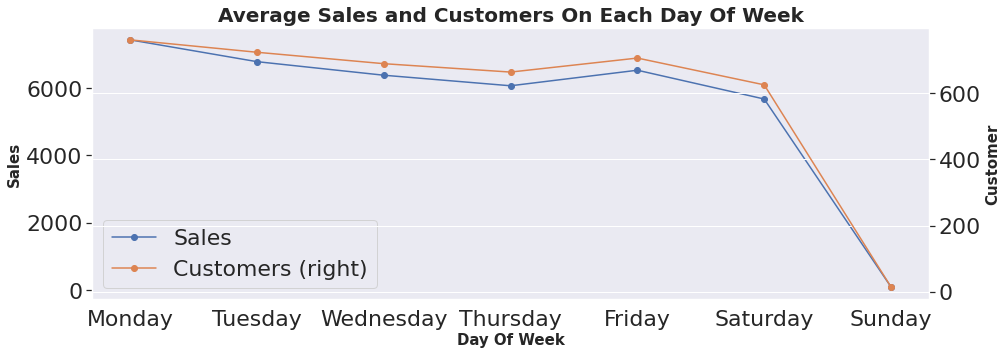

In [ ]:
# Plotting Average sales and number of customers per DayOfWeek using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('DayOfWeek')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.xticks(range(1,8),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Average Sales and Customers On Each Day Of Week',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Day Of Week',size=15,fontdict={"weight": "bold"})

**Here we can infer from the graph that the sales are at maximum on Mondays while sales are zero on Sunday because it seems like store use to remain closed on Sundays.**

Text(0.5, 0, 'Months')

<Figure size 1440x360 with 0 Axes>

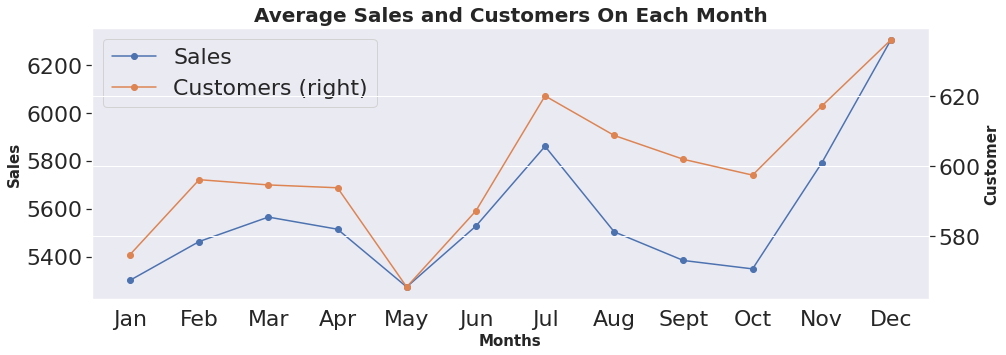

In [ ]:
# Plotting Average sales and number of customers per month using line graph
plt.figure(figsize=(20,5))
ax = df.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.right_ax.set_ylabel('Customer',size=15,fontdict={"weight": "bold"})
plt.xticks(range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.title('Average Sales and Customers On Each Month',fontsize=20,fontdict={"weight": "bold"})
ax.set_xlabel('Months',size=15,fontdict={"weight": "bold"})

**Here we can see that the Sales and Customers are at peak during November and December due to festive season like Christmas while sales are at lowest during January and May or we may say these months to be off season.**

Text(0.5, 1.0, 'Sales During State Holidays')

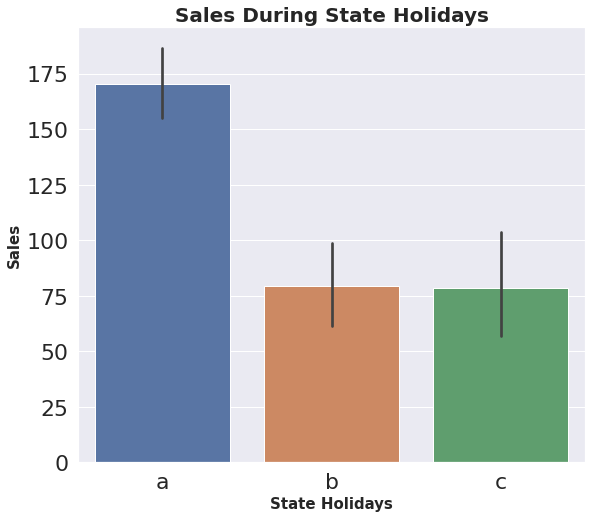

In [ ]:
# countplot for sateholiday sales
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
ax = sns.barplot(data=df[(df.StateHoliday != 0) & (df.StateHoliday!= '0')],x='StateHoliday',y='Sales')
ax.set_xlabel('State Holidays',size=15,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=15,fontdict={"weight": "bold"})
ax.set_title("Sales During State Holidays",fontsize=20,fontdict={"weight": "bold"})

**a = Public holiday, b = Easter holiday, c = Christmas holiday**

**Here we can see that during Public holidays store made more sales compared to Easter and Christmas holidays.**

Text(0.5, 1.0, 'Impact of School Holidays on Sales')

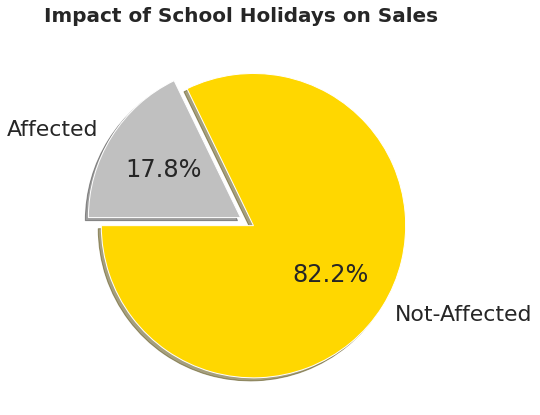

In [ ]:
# Pie chart for schoolholiday

plt.figure(figsize=(15,8))
plt.subplot(121)
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Impact of School Holidays on Sales",size=20,fontdict={"weight": "bold"})

**Here we can see that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students.**

# Key findings
* From the first graph it is clear that 'a' Store Model have the maximum number of sales and store counts followed by 'd' while Store Model 'b' have the least number of sales and store counts.

* From second graph  it is surprising to see that store model "b" which have least number of store counts performs quite well on average sales and customers compared to other store models.

* We can see from the graph that Basic Assortment level have the maximum number of sales and store counts followed by Extended level while Extra Assortment have the least number of sales and store counts

* We can infer from the graph that assortment level 'b' with least store counts have perform quite well compared to 'a'. While there is an another surprising fact that assortment level 'c' have maximum number of sales with the least number of customers.

*  Here we can see from the graph that there is a linear relationship between customer and sales and it is also noticiable that whenever promo was open, the store has higher sales and customer compared to the period when promo was closed, which means promo had good impact on the sales.

* We can infer from the graph that the sales is highest on 30th followed by 2nd and 4th date of every month while sales is lowest on the 1st date of every month followed by 25th and 26th date.



*  Here we can infer from the graph that the sales are at maximum on Mondays while sales are zero on Sunday because it seems like store use to remain closed on Sundays.

* Here we can see that the Sales and Customers are at peak during November and December due to festive season like Christmas while sales are at lowest during January and May or we may say these months to be off season.



* Here we can see that during Public holidays store made more sales compared to Easter and Christmas holidays.



* Here we can see that 17.8% of the sales gets affected by the school holidays which also means that around 17% of the sales are oriented from the school students.



#Conclusions From EDA
 1.We can say that as assortment level a(basic) was most followed c(extended). We can conclude that most of the stores either used to keep basic types of products or extended ones.
2. As we can see a linear relationship between customer and sales whenever promo is applied  it can be concluded that most of the customers came for shopping during the promo days as cost was lower on those days.
3. As we can see in the graph that sales was low on the initial days of the month as compared to the final days it can be assumed that people used to shop for the next month and the end of the previous month. Those products can be mainly be of basic necessities of a person's daily life.
4. It can be seen that average sales on monday was more as compared to sundays because mainly on holidays people prefer to do other things rather than shopping for their basic necessities or they might prefer to stay at home.
5.As shown in the graph sale during the november and december month was high followed by a holiday and it can be assumed that most people might be followers of christian religion.
6.It can be assumed that school holidays make big difference in sales . It can be assumed that out of the total perrcentage of products a good percentage of products is meant for school students i.e 17.8%. 

# **5. Feature Engineering**

### **Square Root Transformation**

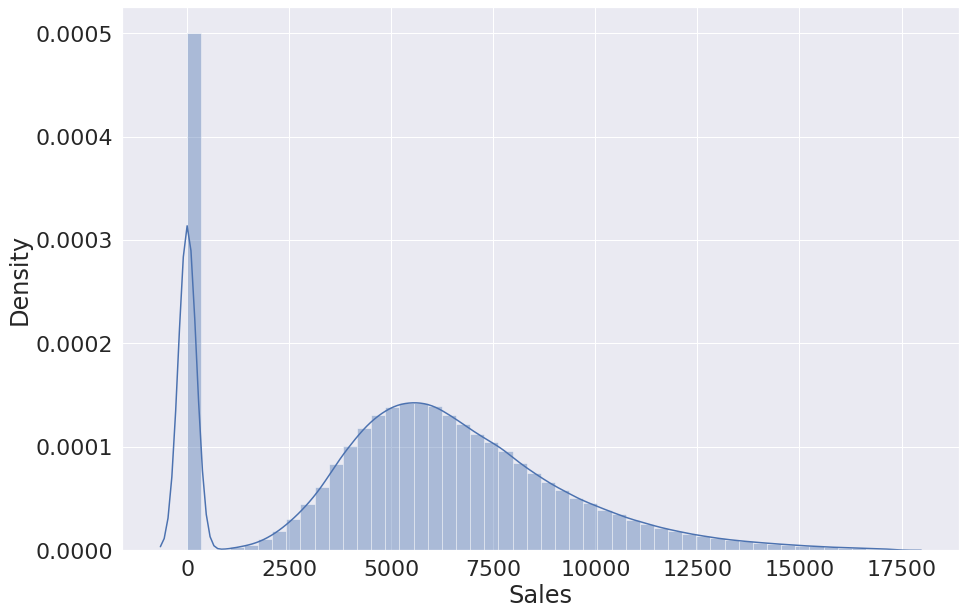

In [ ]:
# Checking our sales column distribution
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

In [ ]:
# square root transformation of sales column
df['Sales'] = np.sqrt(df['Sales'])

**We have noticed that our sales column was right skewed so here we have used square root transformation to remove the skewness.**

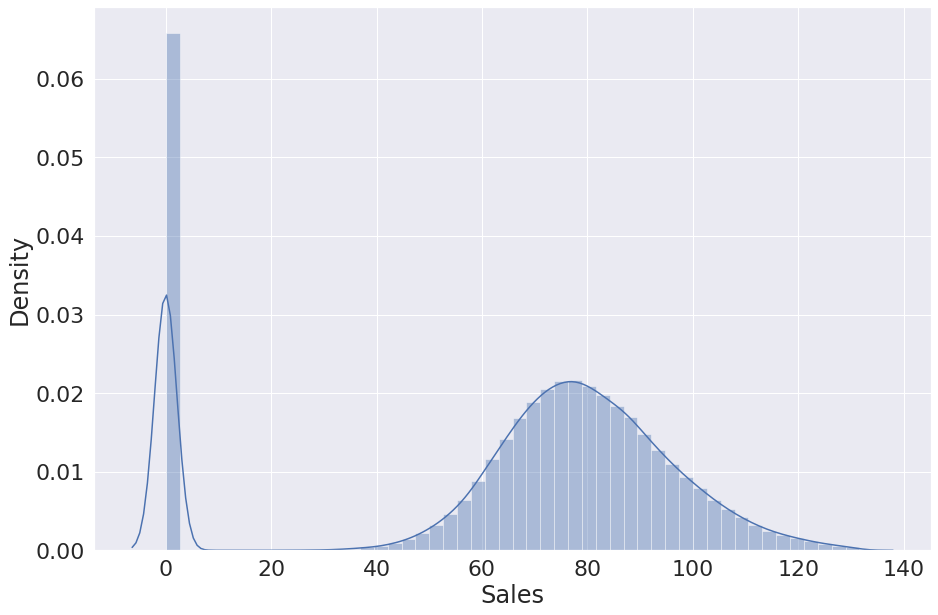

In [ ]:
# Again checking our sales column distribution
plt.figure(figsize=(15,10))
sns.distplot(df['Sales'])

### **Multicollinearity**

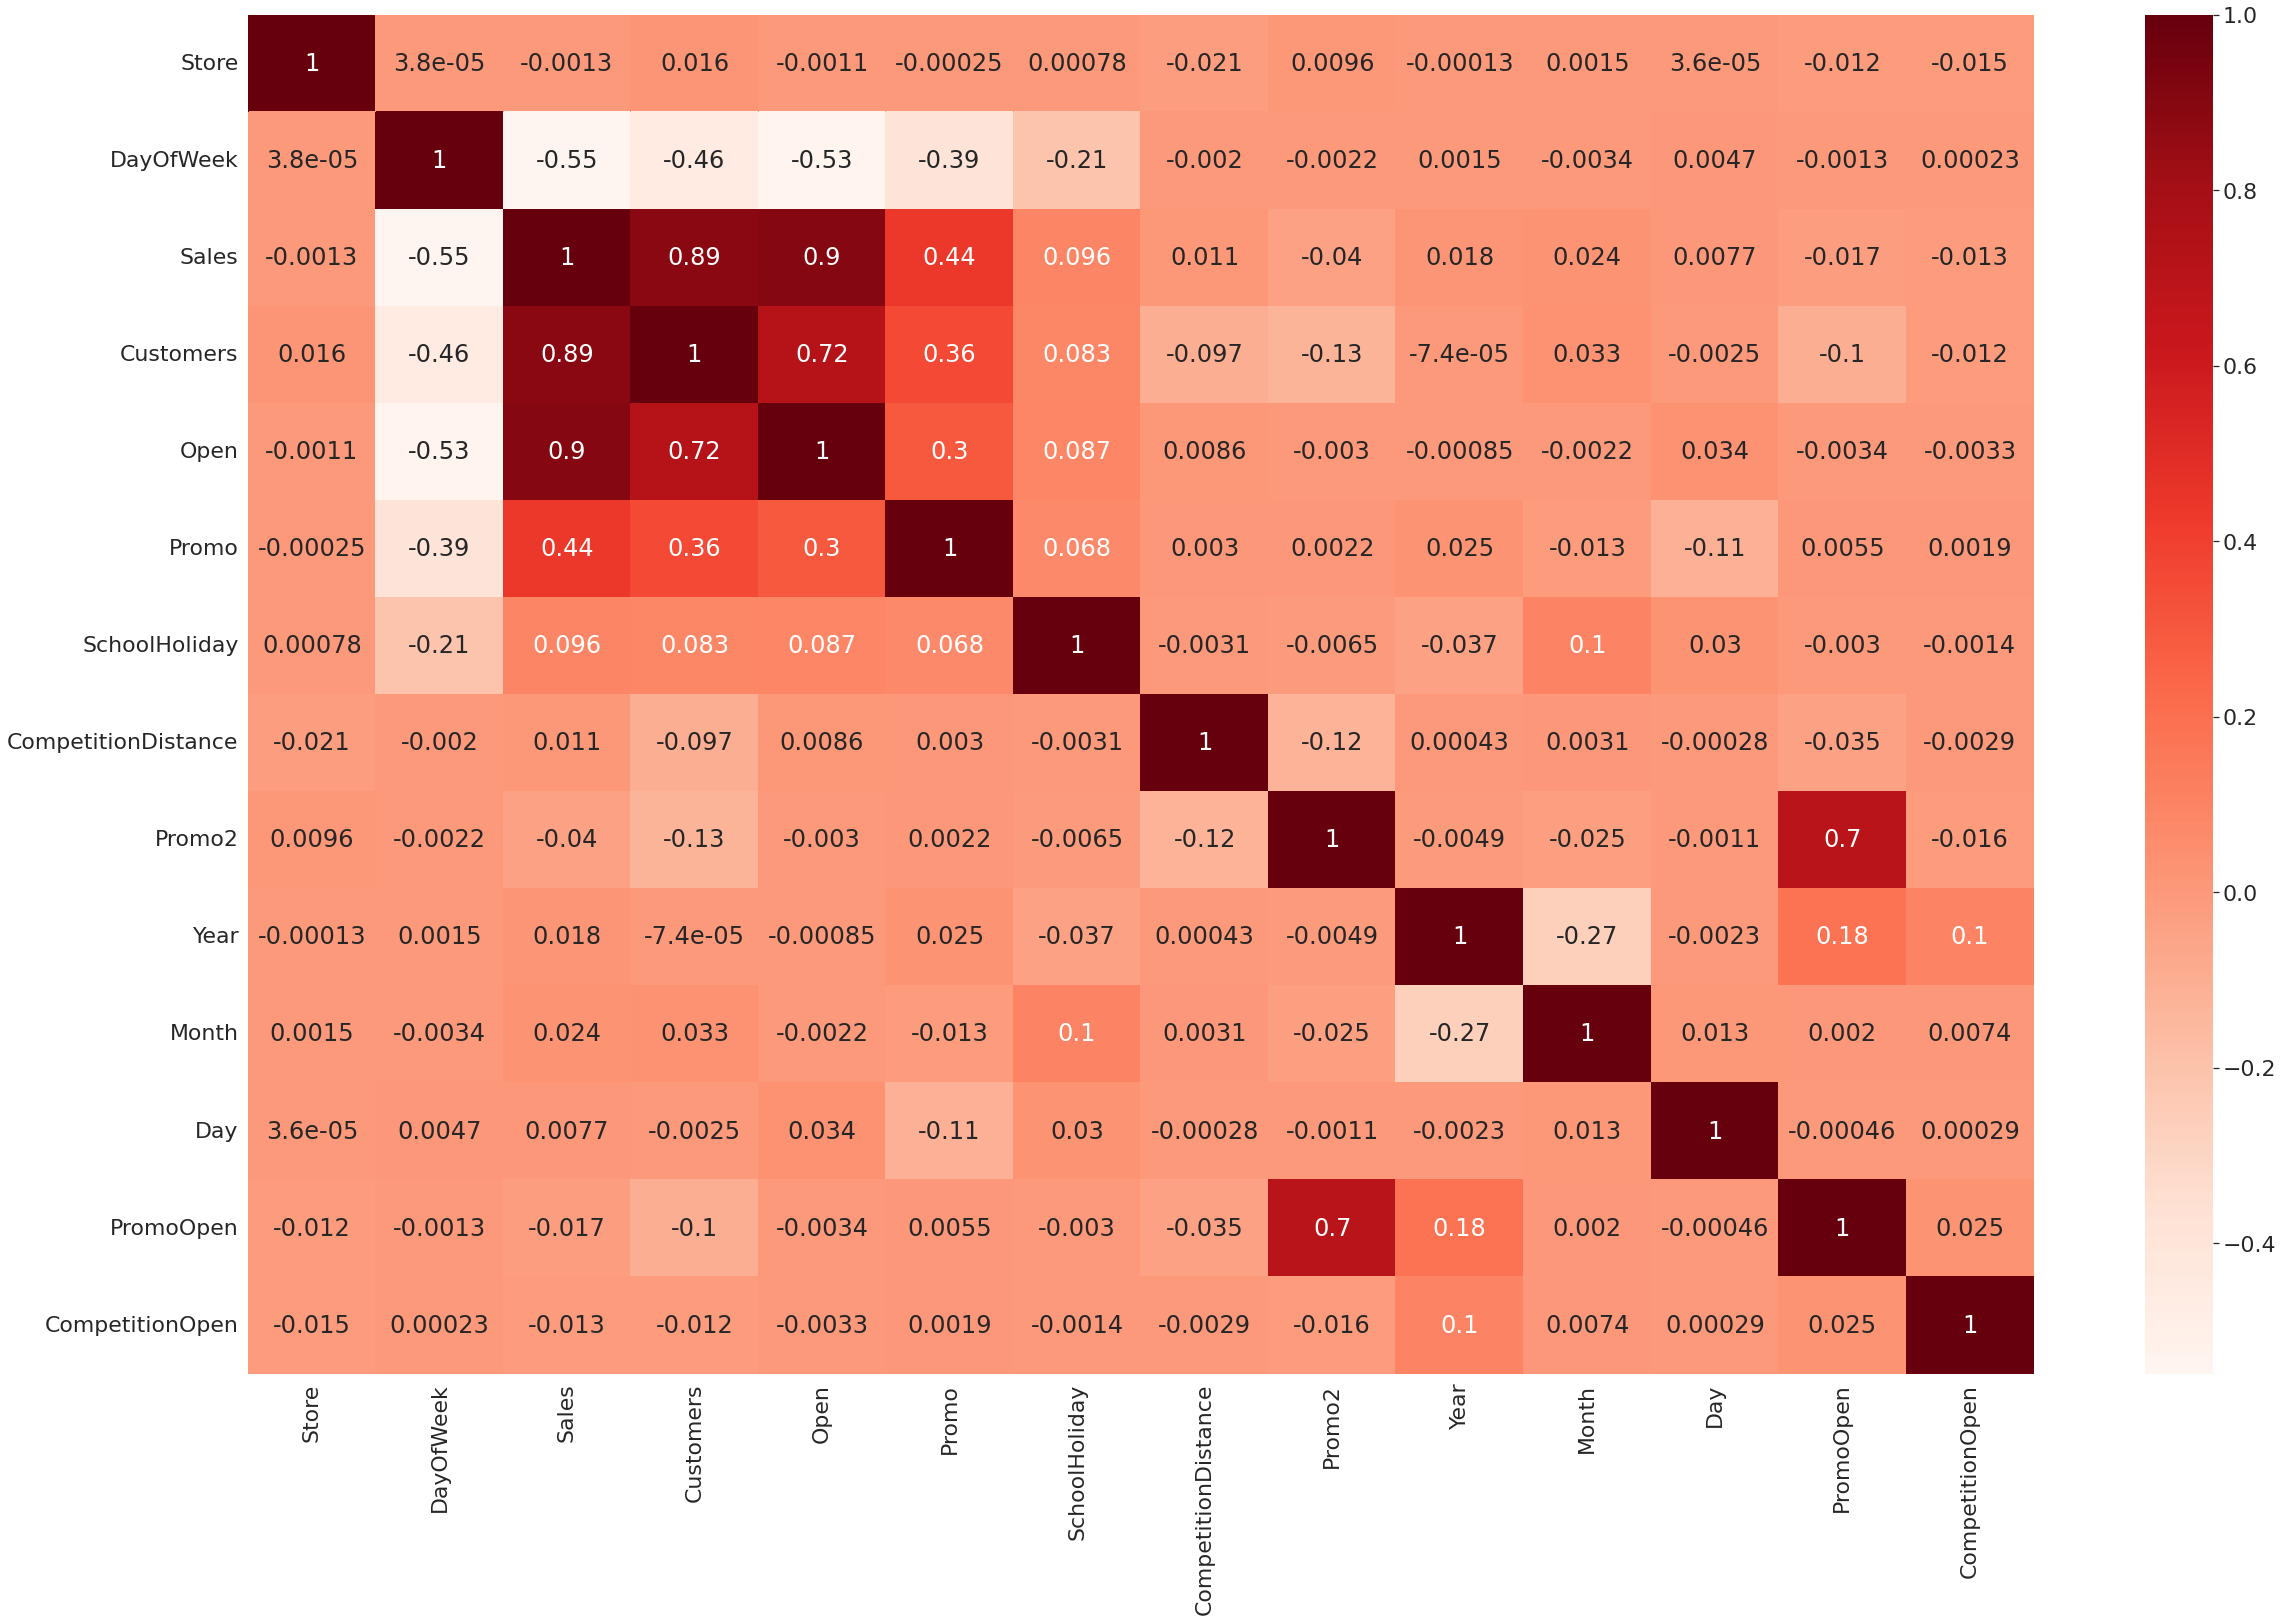

In [ ]:
#let's analysize if there is any numerical corelation.

plt.figure(figsize=(40,25))
ml_corr = df.corr()
heatmap=sns.heatmap(ml_corr ,cbar=True,annot=True, cmap="Reds")

In [ ]:
#df=df.drop(["WeekOfYear"], axis=1)

### **Dummificaton**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996977 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                996977 non-null  int64  
 1   DayOfWeek            996977 non-null  int64  
 2   Sales                996977 non-null  float64
 3   Customers            996977 non-null  int64  
 4   Open                 996977 non-null  int64  
 5   Promo                996977 non-null  int64  
 6   StateHoliday         996977 non-null  object 
 7   SchoolHoliday        996977 non-null  int64  
 8   StoreType            996977 non-null  object 
 9   Assortment           996977 non-null  object 
 10  CompetitionDistance  996977 non-null  float64
 11  Promo2               996977 non-null  int64  
 12  Year                 996977 non-null  int64  
 13  Month                996977 non-null  int64  
 14  Day                  996977 non-null  int64  
 15  PromoOpen       

In [ ]:
# Converting catagorical variables into dummy integers
df = pd.get_dummies(columns = ['StateHoliday','StoreType','Assortment',], data = df, drop_first = True)

In [ ]:
df.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,...,PromoOpen,CompetitionOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,72.546537,555,1,1,1,1270.0,0,2015,...,0.0,82.0,0,0,0,0,1,0,0,0
1,1,4,70.851958,546,1,1,1,1270.0,0,2015,...,0.0,82.0,0,0,0,0,1,0,0,0
2,1,3,69.152006,523,1,1,1,1270.0,0,2015,...,0.0,82.0,0,0,0,0,1,0,0,0
3,1,2,70.788417,560,1,1,1,1270.0,0,2015,...,0.0,82.0,0,0,0,0,1,0,0,0
4,1,1,78.115299,612,1,1,1,1270.0,0,2015,...,0.0,82.0,0,0,0,0,1,0,0,0


# **6. ML Model**

## **Train-Test Split**

In [ ]:
# x is Independent variable
x = df.loc[:,df.columns!='Sales'] 

# y is Dependent variable
y = df['Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape)

(797581, 21) (199396, 21)


In [ ]:
df.shape

(996977, 22)

## **Model Training**

### **1. Linear Regression**

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### **2. Lasso**

In [ ]:
lass = Lasso(alpha = 0.1, max_iter = 2000)
lass.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=2000)

### **3. Ridge**

In [ ]:
ridge = Ridge(alpha = 10, fit_intercept = True,random_state=0)
ridge.fit(x_train, y_train)

Ridge(alpha=10, random_state=0)

### **4. Decision tree**

In [ ]:
des_regressor = DecisionTreeRegressor(random_state=0)
des_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

### **5. Random Forest**

### **6. Gradient Boosting**

In [ ]:
gbc_reg = GradientBoostingRegressor(random_state =42)
gbc_reg.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

### **7. XGboost**

In [ ]:
xgb_reg=XGBRegressor(max_depth=5,n_estimators=100,learning_rate=0.3,n_jobs=-1)   #Change estimators to 1000
xgb_reg.fit(x_train,y_train)

[19:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.3, max_depth=5, n_jobs=-1)

## **Prediction**

### **1. Linear Regression**

In [ ]:
y_pred = reg.predict(x_test)
r2_score(y_pred,y_test)

0.9612476205661036

### **2. Lasso**

In [ ]:
prediction_lasso = lass.predict(x_test)
r2_score(prediction_lasso,y_test)

0.958184129841043

### **3. Ridge**

In [ ]:
pred_ridge =ridge.predict(x_test)
r2_score(pred_ridge, y_test)

0.9612453650783583

### **4. Decision tree**

In [ ]:
y_pred_des = des_regressor.predict(x_test)
r2_score(y_pred_des, y_test)

0.989807065871467

### **5. Random Forest**

### **6. Gradient Boosting**

In [ ]:
y_pred_gb =gbc_reg.predict(x_test)
r2_score(y_pred_gb,y_test)

0.9752728974497129

### **7. XGboost**

In [ ]:
y_pred_xgb =xgb_reg.predict(x_test)
r2_score(y_pred_xgb,y_test)

0.9898649570522713

In [ ]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=1000,learning_rate=0.3,n_jobs=-1)
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)

In [ ]:
xgb.plot_importance(xgb_clf)

## **7. Conclusion**

In [ ]:
xgb.plot_importance(xgb_clf)